# Introduction

Welcome to module 3 of the Data Mining track. In this module we will be covering Bivariate Analysis. Specifically, we will be investigating the following topics: 

- Variable Types: Categorical vs. Numerical Variables
- Test for between numerical variables -- Correlation Coefficient 
- Test for between categorical variables -- Chi-squared
- Test for between categorical and numerical variables -- T-Test and ANOVA

## How to Run the Module

Throughout this module you will encounter both text and code cells. Please run each cell in this Notebook by clicking "Run" button in the Toolbar or by pushing Shift+Enter keys

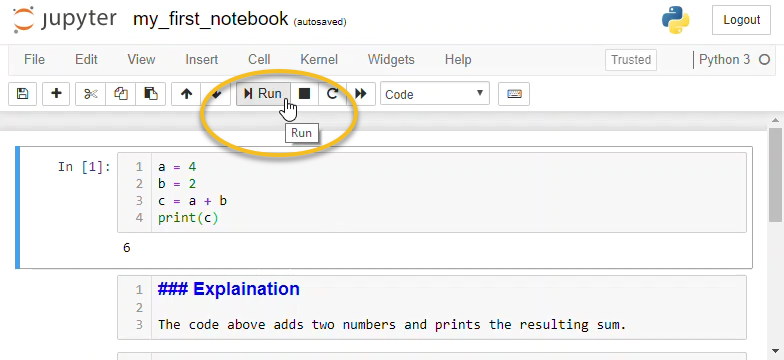

The cell above is an example of a code cell. You will be running numerous code cells like the one below throughout the case. Select the cell and select the run button above. 

In [ ]:
# This is an example of a code cell
print('Congratulations!')
print('You\'ve run your first code cell.')

# Bivariate Analysis and Significance Level

## Video

Please click on the following picture to nevigate to the course video.

[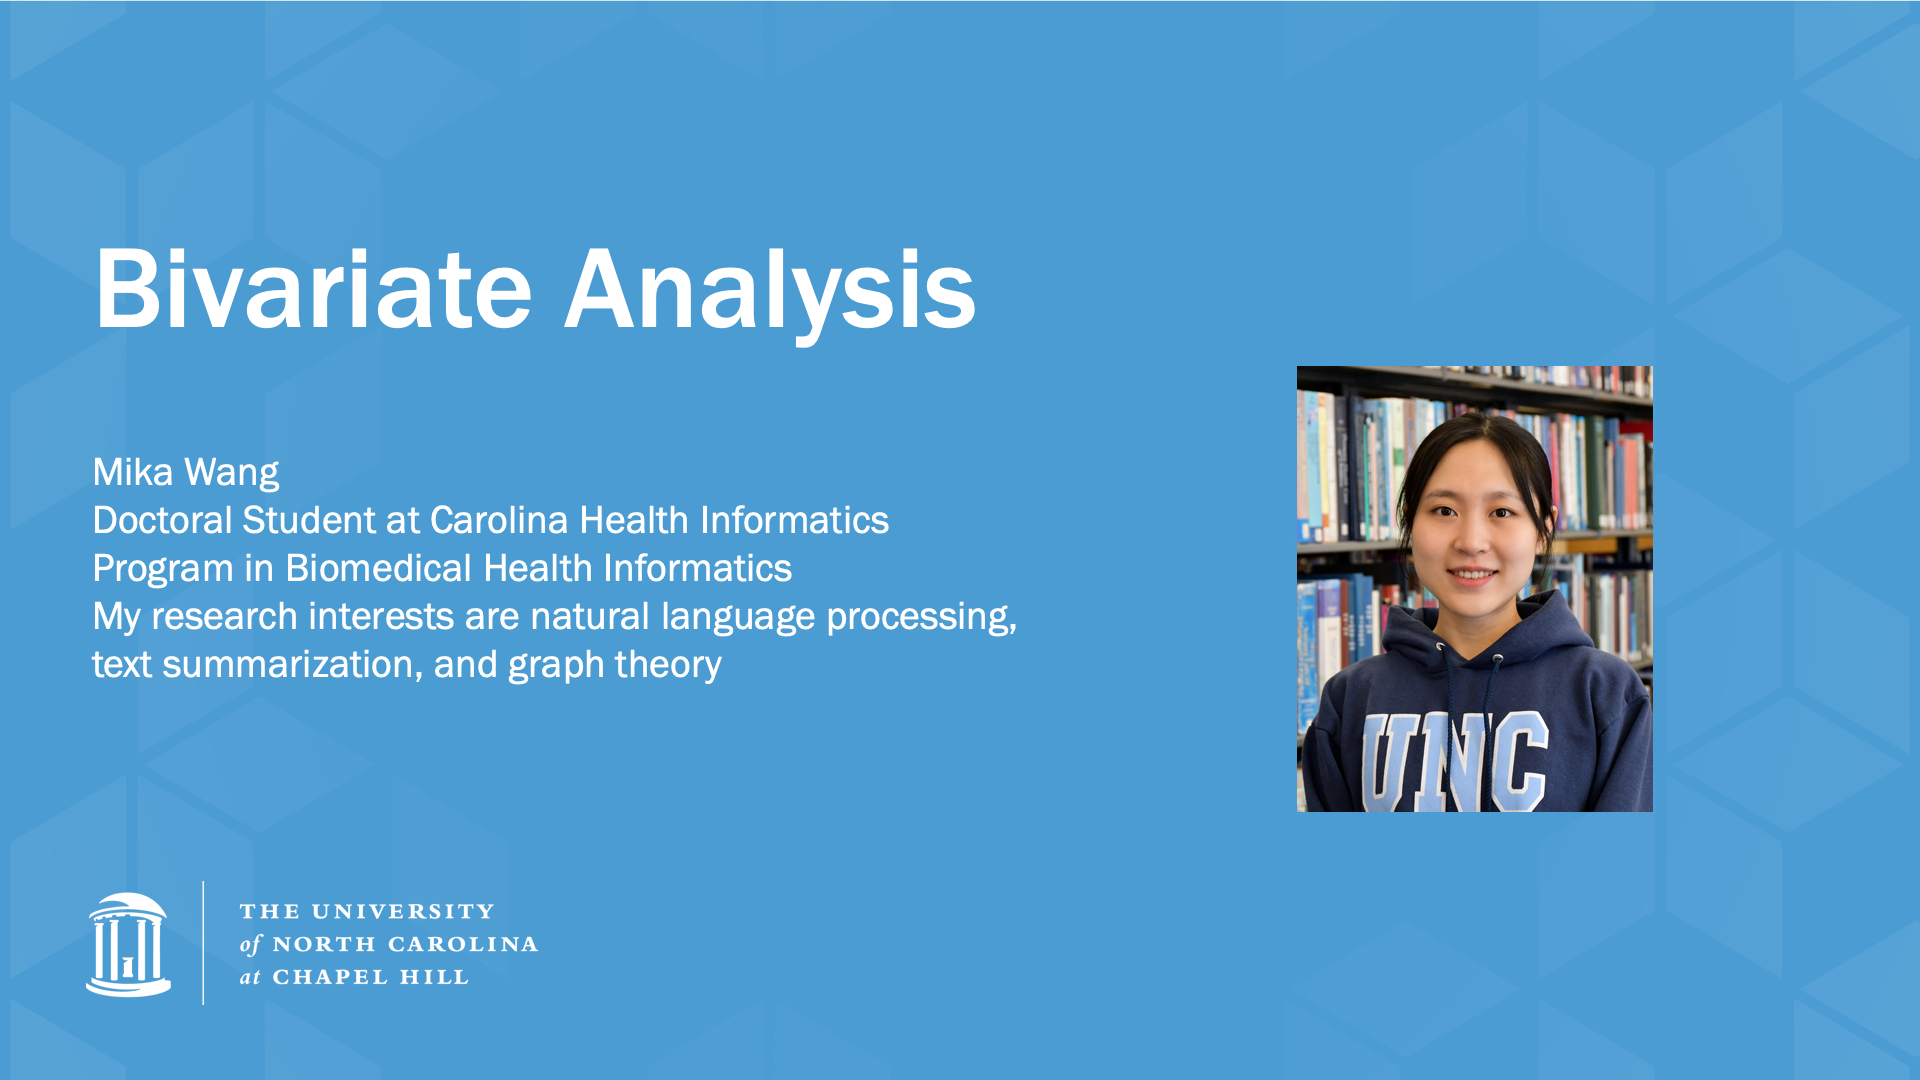](https://edpuzzle.com/media/5ee9689b1b5c453ec8d7fe7e)

# Variable Type

## Video

Please click on the following picture to nevigate to the course video.

[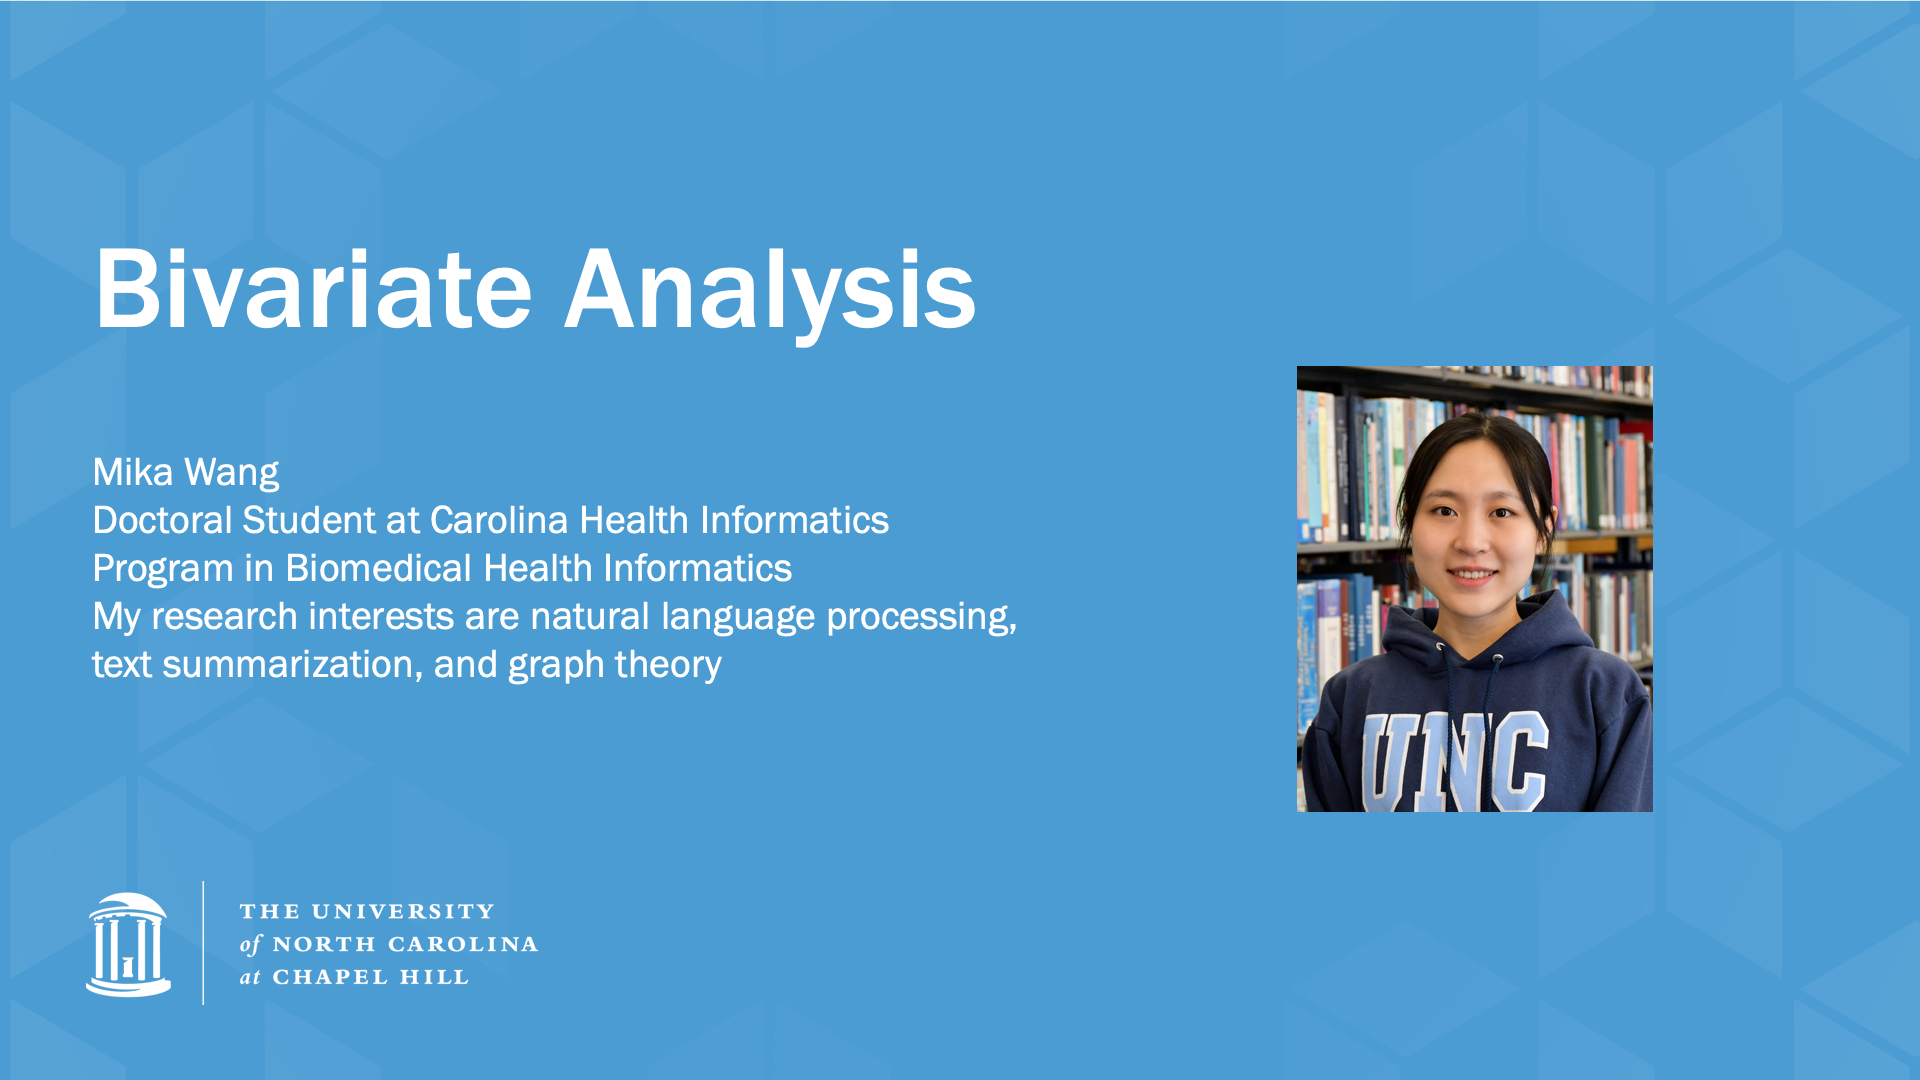](https://edpuzzle.com/media/5ee969fd6323ff3f0ab573d8)

# Generate Demo Dataset

Bivariate analysis is a statistical method describing relationship between two variables. The variables have multiple types. In this section, we'll show examples of tests that can be applied on different pairs of variables and the code in R for realizing them. Before we start working on these tests, let's generate the demo dataset first.   

First of all, load our demo data.

In [ ]:
data <- read.csv('csv_files/training_v2.csv')
data_dict <- read.csv('Data/data_dictionary.csv')

print("Data loaded!")

Read the first ten rows to have a general idea of our data.

In [ ]:
data[0:10,]

Data_dict serves as a dictionary whose content tells us the exact meaning of the columns in the data above. We define a function here to help look up the dictionary.

In [ ]:
var_dict <- function(variable_name){
    row <- data_dict[data_dict$Variable.Name==variable_name,]
    print(paste("Variable Name: ", toString(variable_name)))
    print(paste("Unit of Measure: ", toString(row$Unit.of.Measure)))
    print(paste("Data Type: ", toString(row$Data.Type)))
    print(paste("Description", toString(row$Description)))
}

print("function defined!")

We can have a look of all of the variables in our dataset.

In [ ]:
colnames(data)

Then check the property of one of them using our function.

In [ ]:
var_dict('patient_id')

The data type for patient_id is defined as "integer" which seems like numeric. However, since id usually serves as an identifier which has no order information embeded (patient with id 2 doesn't have a larger value than patient having id 1), we'll treat it as a nominal variable. To make it clear, the "data type" that is encoded in our dataset is for computer programming, which is slightly different from the "variable type" in the video. What can be told is that "numeric" data are usually continuous while "binary" and "string" are usually nominal. You may need to think a little bit before deciding an variable of "integer" data type which could be discrete, ordinal, or nominal. 

# Between numerical variables -- Correlation Coefficient

## Video

Please click on the following picture to nevigate to the course video.

[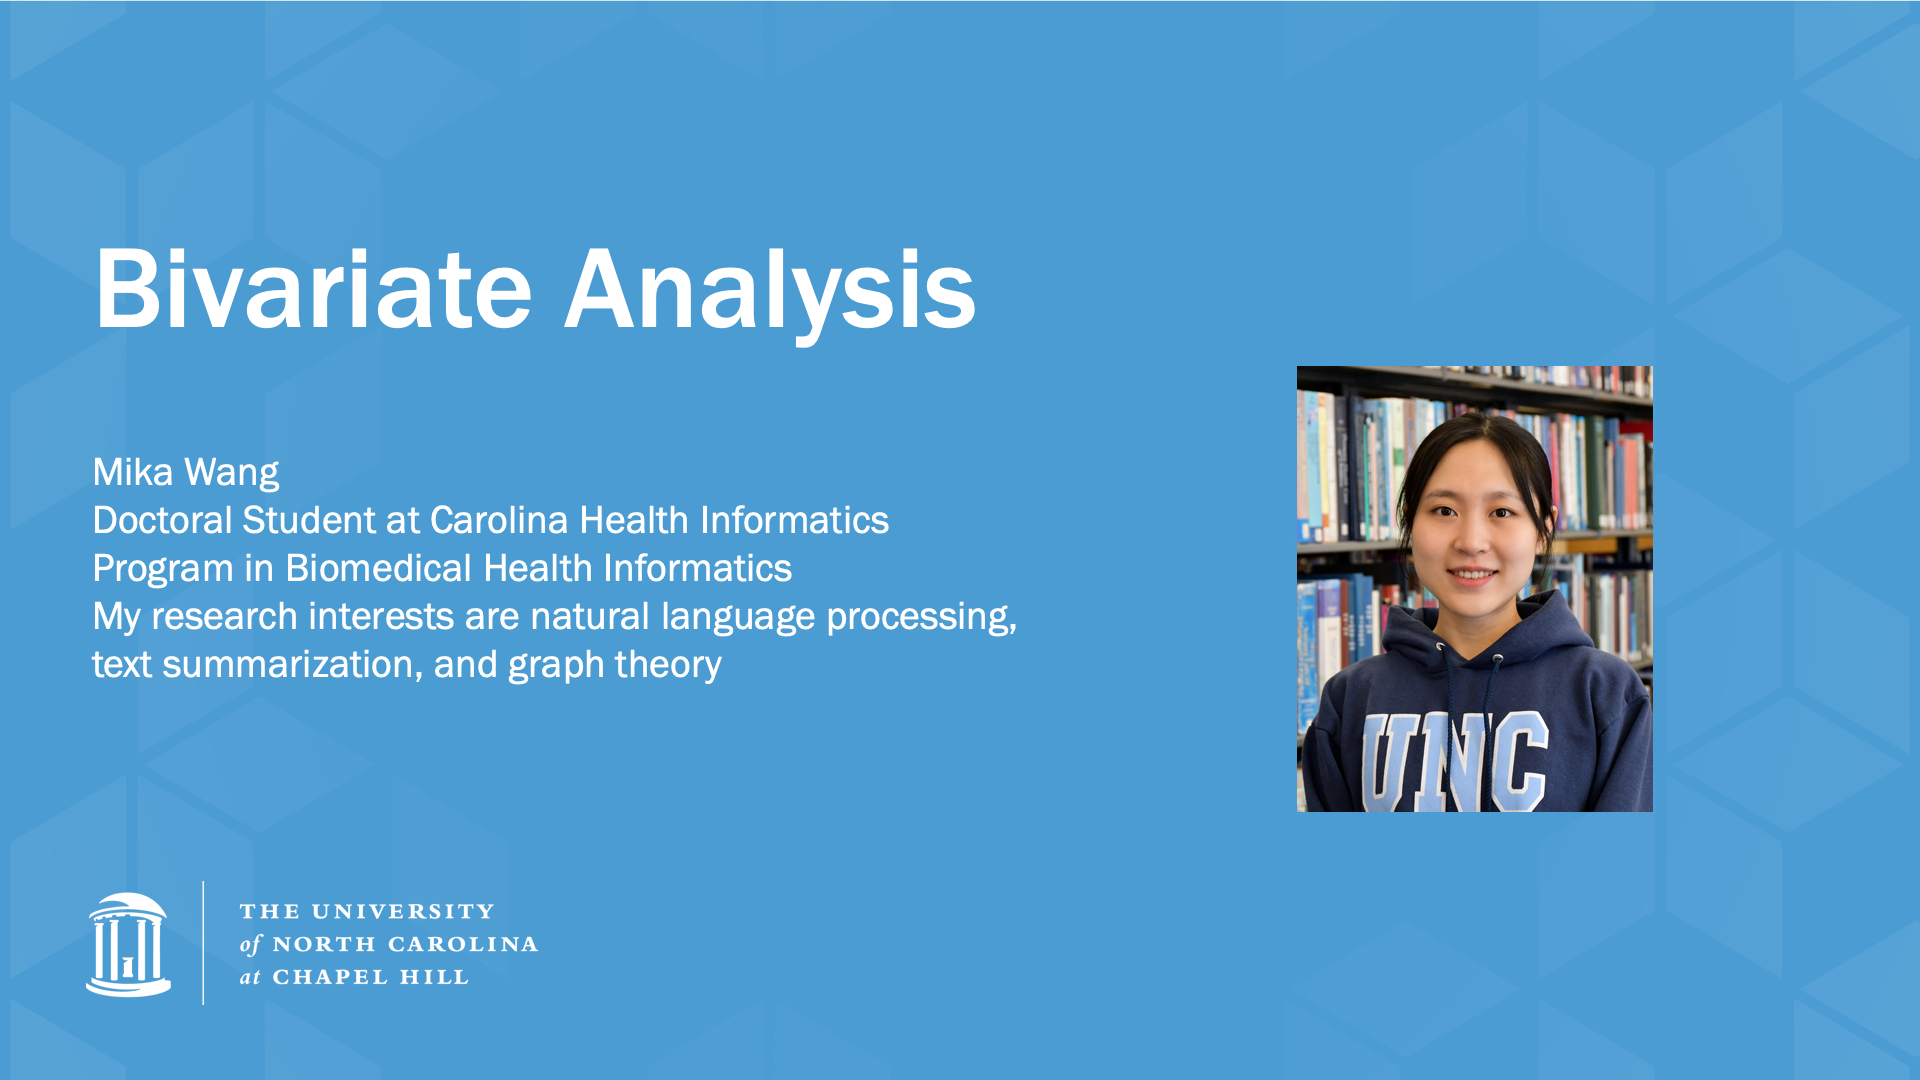](https://edpuzzle.com/media/5ee96fe15b84823f17cf5dd5)

## How to conduct a Correlation Coefficient test in R

As we talked about in the video, different tests should be used for different pairs of variables. 

For between numerical variables, two typical relationships that we'd like to investigate are correlation and regression. Keep in mind that correlation doesn't necessarily infer causation while in regression, one of the variables is dependent on the other. We'll focus on correlation in this section and talk more about regression in the later sections.

Let's take a look at if there is a correlaiton between age and bmi. The null hypothesis will be, "there is no relationship between age and bmi."

First of all, we need to clean the data by removing the pairs with null values.

In [ ]:
height_weight <- subset(data, is.na(data$height)!=TRUE & is.na(data$weight)!=TRUE , select = c("height","weight"))
print("Data subseted!")

In [ ]:
cor.test(height_weight$height, height_weight$weight, method="pearson")

From the correlaiton test, we can see that weight and height have somehow positive relationships (although not very strong). The p-value shows that the resule is significant, i.e. trustable according to a 95% confident interval. Thus, we can reject the null hypothesis. 

To show the result intuitively, let's visualize it with a scatter plot.

In [ ]:
library(ggplot2)

In [ ]:
qplot(height_weight$height, height_weight$weight)

## Exercises

**Warning**  
<font color = blue, size = 4> 
    Your work will not be saved in Jupyter Notebook. You are recommended to copy your work and paste it to a safe place to record your work.
<font>

Let's try to conduct the Correlation Coefficient test on other numerical variables -- weight and bmi. First of all, let's subset the data we need.

In [ ]:
# subset the data we need
# your code here

In [ ]:
bmi_weight <- subset(data, is.na(data$bmi)!=TRUE & is.na(data$weight)!=TRUE , select = c("bmi","weight"))
print("Data subseted!")

In [ ]:
# Conduct correlation test
# your code here

In [ ]:
cor.test(bmi_weight$bmi, height_weight$weight, method="pearson")

In [ ]:
# Visualize the results using scatter plot
# your code here 

In [ ]:
qplot(bmi_weight$bmi, height_weight$weight)

# Between Nominal Variables -- Chi-squared Test

## Video

Please click on the following picture to nevigate to the course video.

[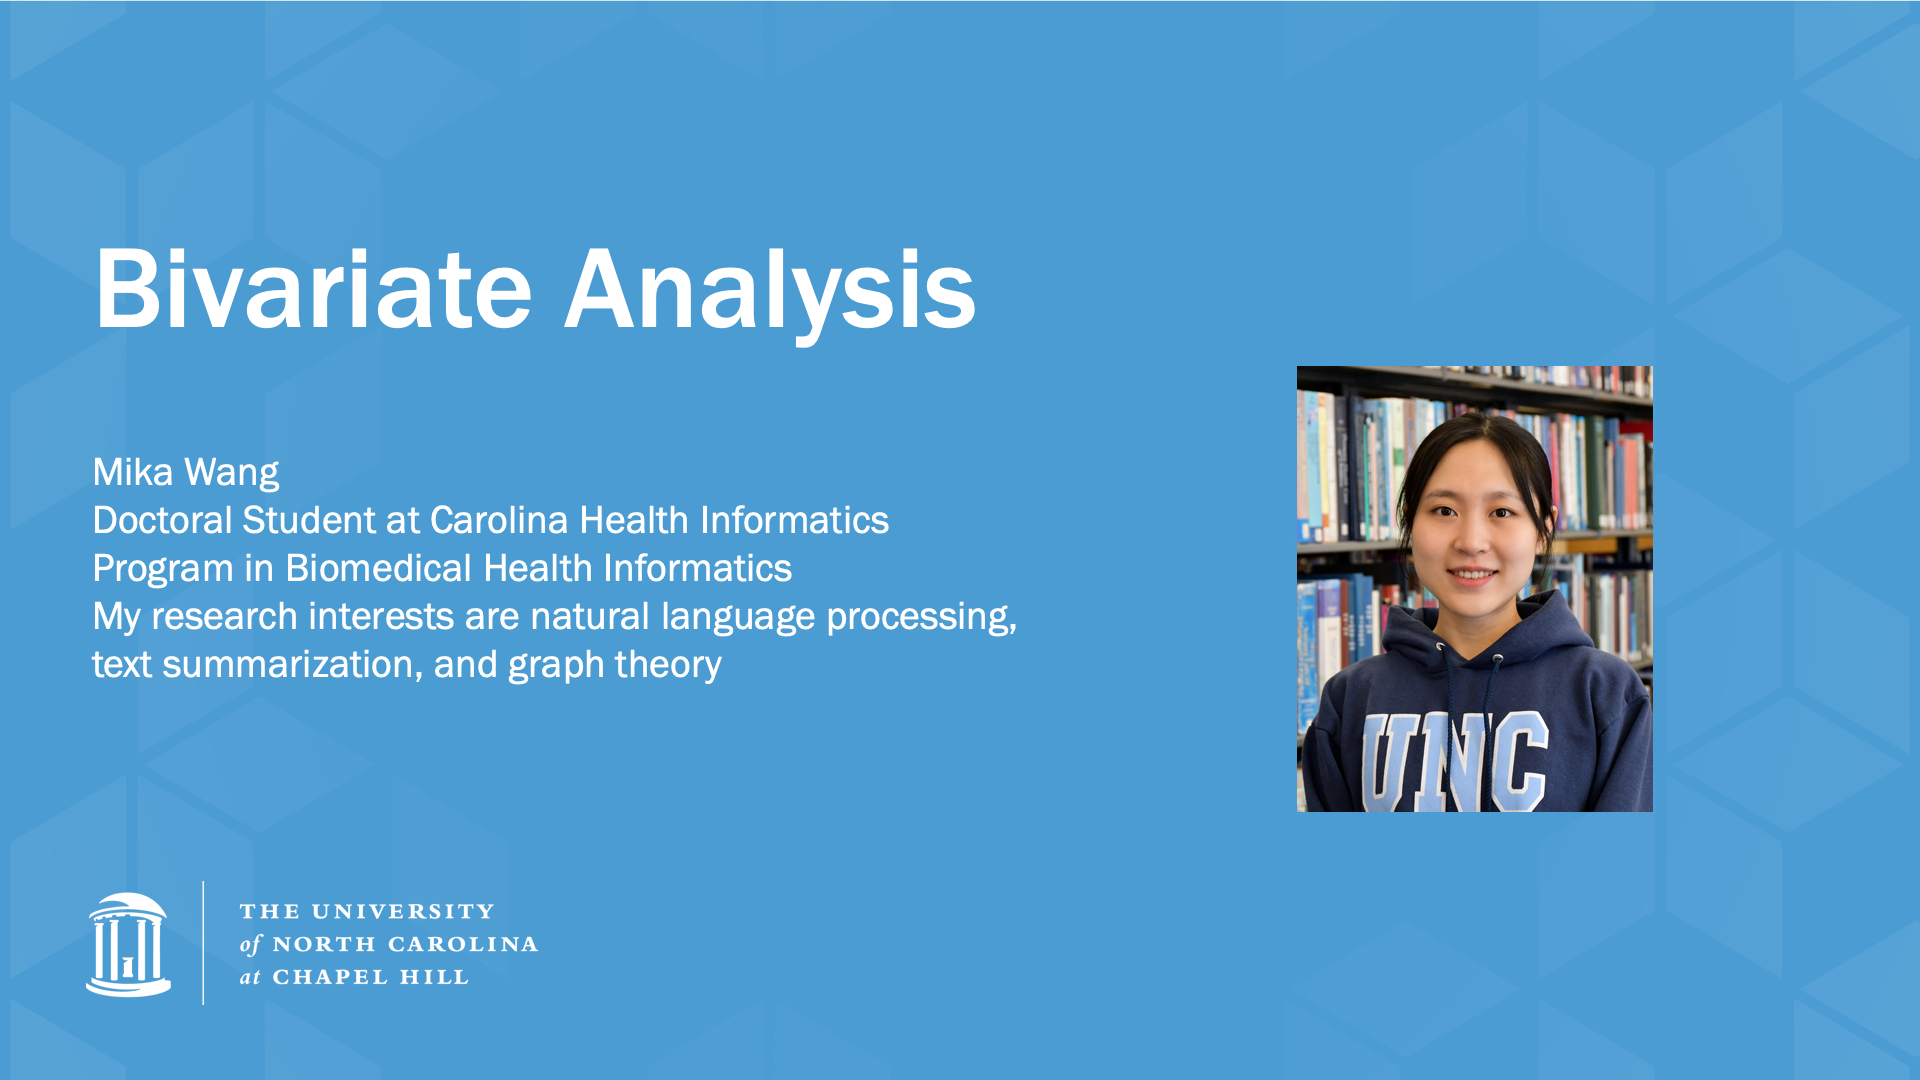](https://edpuzzle.com/media/5eea223158d7773f32a7e75e)

## How to conduct a Chi-squared test in R

The second test we are showing here is Chi-squared which is used on categorical variables. This time let's investigate whether there is relationship between "hospital_admit_source"(The location of the patient prior to being admitted to the hospital) and "gender". Here the null hypothesis will be "There is no relationship between the location of the patient prior to being admitted to the hospital and the gender."

The test needs to be run on a contingency table. The data has to be cleaned and put together before being turned into a table.The following code shows all distinct values in the data we want to investigate. We'd like to get rid of the empty ones. 

In [ ]:
levels(data$hospital_admit_source)
levels(data$gender)

The following code subsets the useful columns from the original data and gets rid of the empty cells. 

In [ ]:
source_gender <- subset(data, hospital_admit_source!='' & gender!='', select=c('hospital_admit_source', 'gender'))
print("Data subseted!")

Now try to make the contingency table based on the new dataset, what do you find?

In [ ]:
source_gender_tab <- table(source_gender)
source_gender_tab

The column and the row which denote empty values are composed of zeros. And if you run Chi-squared test on this table, you'll get an error. This is because that although you get rid of the empty cells by the subset function above, the variable still contains such a level. Check it by the following code.

In [ ]:
levels(source_gender$hospital_admit_source)
levels(source_gender$gender)

What we need to do is to run the factor function on the new columns again to generate new levels

In [ ]:
source_gender$gender <- factor(source_gender$gender)
source_gender$hospital_admit_source <- factor(source_gender$hospital_admit_source)
source_gender_tab

This time we see the correct table. Let's run the test on it.

In [ ]:
source_gender_tab <- table(source_gender)
chisq.test(source_gender_tab)

The p-value tells us the two variables are significantly correlated. We can reject the null hypothesis. The warning message shows since our table is not well balanced (15 * 2). It is very likely that got the result because there are more male patients. Feel free to try some other categorical variables in the dataset and see how it goes. 

Let's visualize our result in a barplot. 

First of all, transform the table into a dataframe as the functions in ggplot only takes dataframe.

In [ ]:
source_gender_tab_df <- data.frame(source_gender_tab)
source_gender_tab_df

Then draw the barplot.

In [ ]:
ggplot(source_gender_tab_df, aes(x=gender, y=Freq, fill=hospital_admit_source)) + geom_bar(stat="identity",position=position_dodge())

## Exercises

**Warning**  
<font color = blue, size = 4> 
    Your work will not be saved in Jupyter Notebook. You are recommended to copy your work and paste it to a safe place to record your work.
<font>

This time let's try to conduct the Chi-squared test on another two categorical variables -- elevtive surgery and ethnicity. First of all, we use the variable dictionary to see the description of the two variables.

In [ ]:
var_dict('elective_surgery')
var_dict('ethnicity')

To make the results more intuitive, we transform the original binary 0s and 1s to 'true' and 'false', then assign levels using the factor() function.

In [ ]:
data$elective_surgery [data$elective_surgery == 1] <- 'true'
data$elective_surgery [data$elective_surgery == 0] <- 'false'
data$elective_surgery <- factor(data$elective_surgery)

Now, please follow the instruction bellow to finish the test and visualization.

In [ ]:
# Subset the data we need.
# your code here


In [ ]:
surgery_eth <- subset(data, elective_surgery!='' & ethnicity!='', select=c('elective_surgery', 'ethnicity'))
print("Data subseted!")

In [ ]:
# Use factor() function to refresh the levels of your variable.
# your code here


In [ ]:
surgery_eth$ethnicity <- factor(surgery_eth$ethnicity)

In [ ]:
# Check what levels are in each of the variables
# your code here


In [ ]:
levels(data$elective_surgery)
levels(data$ethnicity)

In [ ]:
# Generate the contingency table for frequency.
# your code here


In [ ]:
surgery_eth_tab <- table(surgery_eth)
surgery_eth_tab

In [ ]:
# Conduct the Chi-squared test
# your code here


In [ ]:
chisq.test(surgery_eth_tab)
# Just note that the results may not be totally trustworthy 
# since the data is heavily skewed. check this out in the visualization in the following cells

In [ ]:
# Generate the dataframe for your contingency table
# your code here


In [ ]:
surgery_eth_tab_df <- data.frame(surgery_eth_tab)
surgery_eth_tab_df

In [ ]:
# Visualize the result using a bar plot in ggplot package
# your code here


In [ ]:
ggplot(surgery_eth_tab_df, aes(x=ethnicity, y=Freq, fill=elective_surgery)) + geom_bar(stat="identity",position=position_dodge())

# Between a nominal variable and a numerical variable -- T-Test and ANOVA

## Video

Please click on the following picture to nevigate to the course video.

[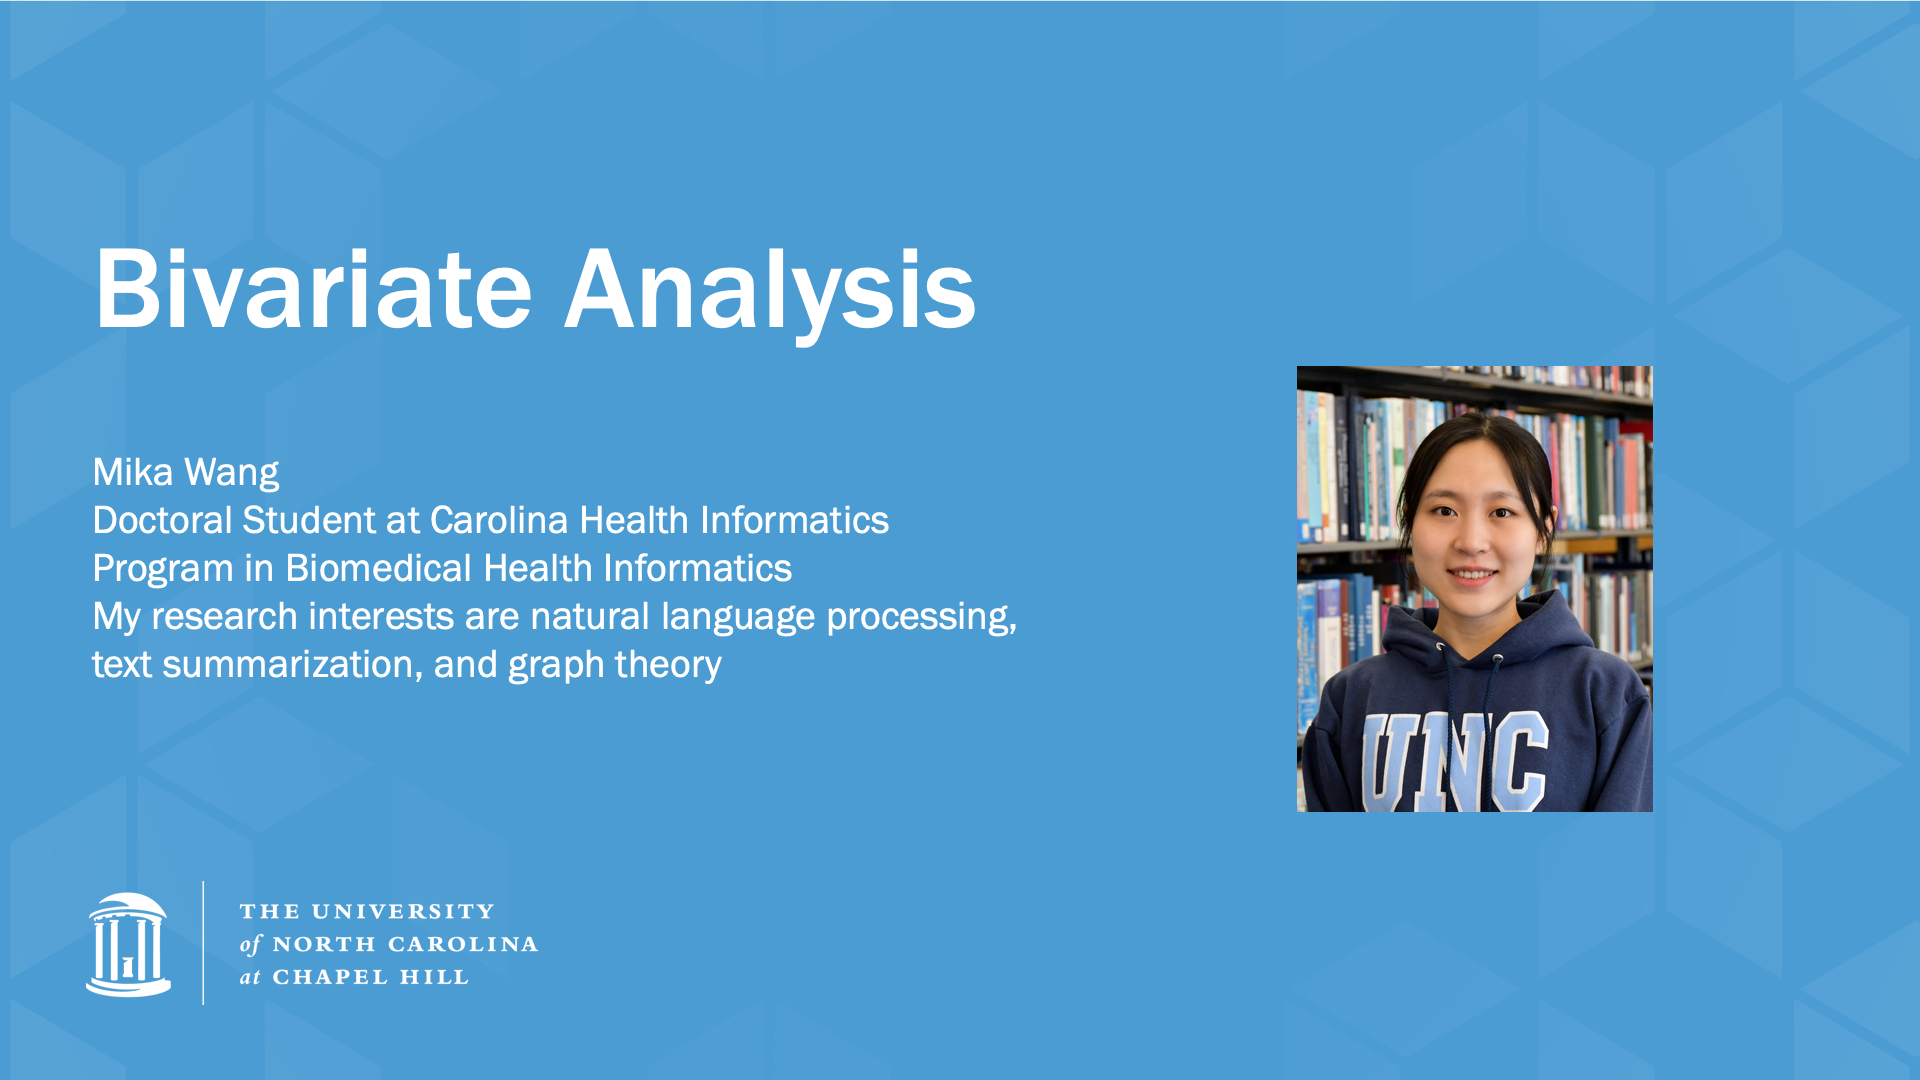](https://edpuzzle.com/media/5eea54cf57b84f3f2979d204)

## T-Test

### How to conduct a T-Test in R

We use t-test when there are only two levels in our categorical variable and use Anova when the levels are more than two. We'll talk about Anova in the next section.

Let's test whether there is a relationship between the patients' gender and their height. First of all, let's clean the data and subset the data from the original dataframe. The null hypothesis will be "There is no significant relationship between the equality of means of the two groups and the gender of groups."

In [ ]:
height_gender <- subset(data, gender != '' & is.na(data$height)!=TRUE , select=c('gender','height')) 
height_gender$gender <- factor(height_gender$gender)

print("Data subseted!")

After subseting, we can run a two sample t-test on our data.

In [ ]:
# in this function, you put your numerical variable first and categorical variable at the second.
pairwise.t.test(height_gender$height, height_gender$gender) 

The p-value is small enough to show that there is a significant relationship between gender and height. We can reject the null hypothesis.

This time, we'll visualize the result using boxplot.

In [ ]:
ggplot(height_gender, aes(x=gender, y=height)) + 
  geom_boxplot(outlier.colour="red", outlier.shape=8,
               outlier.size=4)

### Exercises

**Warning**  
<font color = blue, size = 4> 
    Your work will not be saved in Jupyter Notebook. You are recommended to copy your work and paste it to a safe place to record your work.
<font>

In this exercise, we'll be examining if there is a relationship between the patient election of the surgery and the patient's bmi. Our categorical variable here is elective_surgery and the numerical variable is bmi. 

In [ ]:
# Clean and subset the data we need.
# your code here


In [ ]:
elect_bmi <- subset(data, elective_surgery != '' & is.na(data$bmi)!=TRUE, select=c('elective_surgery','bmi'))
elect_bmi$elective_surgery <- factor(elect_bmi$elective_surgery)

print("Data subseted!")

In [ ]:
# Conduct the T-Test
# your code here


In [ ]:
pairwise.t.test(elect_bmi$bmi, elect_bmi$elective_surgery)

In [ ]:
# Visualize the results using a box plot in ggplot package
# your code here

In [ ]:
ggplot(elect_bmi, aes(x=elective_surgery, y=bmi)) + 
  geom_boxplot(outlier.colour="red", outlier.shape=8,
               outlier.size=4)

## ANOVA

### How to conduct a ANOVA test in R

When there are more than two levels, we use Anova. This time we'll investigate the relationship between the patients' "apache_3j_bodysystem (Admission diagnosis group for APACHE III)" and their bmi. Again, the null hypothesis will be "there is no significant relationship between the equality of means of the groups and the admission diagnosis of the group for APACHE III."

First of all, let's have a look at our data.

In [ ]:
levels(data$apache_3j_bodysystem)
unique(data$bmi)[0:50] #only showing part of the data

Again, we'll get rid of the empty strings as well as the NA values in our data. 

In [ ]:
bmi_diag <- subset(data, data$apache_3j_bodysystem != ''& is.na(data$bmi)!=TRUE , select=c('apache_3j_bodysystem', 'bmi'))
bmi_diag$apache_3j_bodysystem <- factor(bmi_diag$apache_3j_bodysystem)
print("Data subseted and cleaned!")

Following code gives you a summary of the Anova test results for our data. There are a lot of internal calculations not showing here done by the function aov(). We'll not go deeper in this course due to the scope limitaion. 

In [ ]:
anova(aov(bmi~apache_3j_bodysystem, data=bmi_diag))

In this section, we performed a one-way anova since we are investigating the relationship between only one factor (apache_3j_bodysystem) and bmi. The p-value (Pr(>F)) is very small such that we can conclude to reject the null hypothesis. Keep in mind that, in an Anova test, a significant result can only tell you that not all means of the groups are equal. A further investigation will be needed to determine which of the groups have significantly unequal means. 

Similar to previous section, we'll use boxplot to visualize our results.

In [ ]:
ggplot(bmi_diag, aes(x=apache_3j_bodysystem, y=bmi)) + 
  geom_boxplot(outlier.colour="red", outlier.shape=8,
               outlier.size=4) +
  theme(axis.text.x = element_text(angle = 45))


### Exercises

**Warning**  
<font color = blue, size = 4> 
    Your work will not be saved in Jupyter Notebook. You are recommended to copy your work and paste it to a safe place to record your work.
<font>

This time, let's still take bmi as our numerical variable, but use ethnicity as our categorical variable. Please follow the instruction below to finish the test and visualization.

In [ ]:
# Clean and subset your data from the original dataframe
# your code here


In [ ]:
bmi_eth <- subset(data, data$ethnicity != ''& is.na(data$bmi)!=TRUE , select=c('ethnicity', 'bmi'))
bmi_eth$ethnicity <- factor(bmi_eth$ethnicity)

print("Data subseted and cleaned!")

In [ ]:
# Conduct ANOVA on your data
# your code here


In [ ]:
anova(aov(bmi~ethnicity, data=bmi_eth))

In [ ]:
# Visualize the results using box plot in the ggplot package
# your code here


In [ ]:
ggplot(bmi_eth, aes(x=ethnicity, y=bmi)) + 
  geom_boxplot(outlier.colour="red", outlier.shape=8,
               outlier.size=4) +
  theme(axis.text.x = element_text(angle = 45))
